# Load dataset

In [1]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 6.5 MB/s 
     |████████████████████████████████| 1.1 MB 47.2 MB/s 
     |████████████████████████████████| 33.8 MB 130 kB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
     |████████████████████████████████| 2.2 MB 58.6 MB/s 
     |████████████████████████████████| 133 kB 63.2 MB/s 
     |████████████████████████████████| 1.0 MB 62.1 MB/s 
     |████████████████████████████████| 1.3 MB 45.2 MB/s 
     |████████████████████████████████| 1.0 MB 53.9 MB/s 
     |████████████████████████████████| 764 kB 37.0 MB/s 
     |████████████████████████████████| 232 kB 48.3 MB/s 
     |████████████████████████████████| 96 kB 6.0 MB/s 
     |████████████████████████████████| 1.6 MB 44.2 MB/s 
     |████████████████████████████████| 49 kB 6.2 MB/s 
     |████████████████████████████████| 133 kB 55.4 MB/s 
  Created wheel for metaphone: filen

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/Dataset10_Telco_Churn.csv')
df

customerID  gender              PaymentMethod  MonthlyCharges  \
0     7590-VHVEG  Female           Electronic check           29.85   
1     5575-GNVDE    Male               Mailed check           56.95   
2     3668-QPYBK    Male               Mailed check           53.85   
3     7795-CFOCW    Male  Bank transfer (automatic)           42.30   
4     9237-HQITU  Female           Electronic check           70.70   
...          ...     ...                        ...             ...   
7038  6840-RESVB    Male               Mailed check           84.80   
7039  2234-XADUH  Female    Credit card (automatic)          103.20   
7040  4801-JZAZL  Female           Electronic check           29.60   
7041  8361-LTMKD    Male               Mailed check           74.40   
7042  3186-AJIEK    Male  Bank transfer (automatic)          105.65   

     TotalCharges Churn  
0           29.85    No  
1          1889.5    No  
2          108.15   Yes  
3         1840.75    No  
4          151.65   Yes  
...           ...   ...  
7038       1990.5    No  
7039       7362.9    No  
7040       346.45    No  
7041        306.6   Yes  
7042       6844.5    No  

[7043 rows x 6 columns]

In [4]:
df.nunique()

customerID        7043
gender               2
PaymentMethod        4
MonthlyCharges    1585
TotalCharges      6531
Churn                2
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      7043 non-null   object 
 1   gender          7043 non-null   object 
 2   PaymentMethod   7043 non-null   object 
 3   MonthlyCharges  7043 non-null   float64
 4   TotalCharges    7043 non-null   object 
 5   Churn           7043 non-null   object 
dtypes: float64(1), object(5)
memory usage: 330.3+ KB


# EDA

### Drop kolom customerID

In [6]:
df = df.drop(columns=['customerID'])
df.head()

gender              PaymentMethod  MonthlyCharges TotalCharges Churn
0  Female           Electronic check           29.85        29.85    No
1    Male               Mailed check           56.95       1889.5    No
2    Male               Mailed check           53.85       108.15   Yes
3    Male  Bank transfer (automatic)           42.30      1840.75    No
4  Female           Electronic check           70.70       151.65   Yes

### Mengubah dtype total charges menjadi float

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   PaymentMethod   7043 non-null   object 
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
 4   Churn           7043 non-null   object 
dtypes: float64(2), object(3)
memory usage: 275.2+ KB


### Show graphic

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



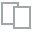
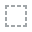
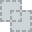
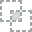
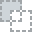
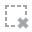
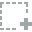
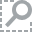
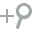
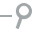
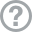
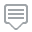
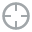
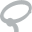
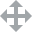
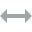
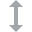
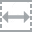
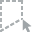
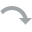
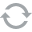
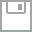
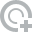
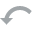
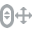
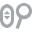
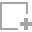
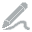
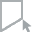
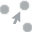
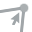
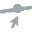

In [9]:
create_report(df).show()

# Data Pre Processing

In [10]:
df.replace({'No':0, 'Yes':1}, inplace=True)

In [11]:
df

gender              PaymentMethod  MonthlyCharges  TotalCharges  Churn
0     Female           Electronic check           29.85         29.85      0
1       Male               Mailed check           56.95       1889.50      0
2       Male               Mailed check           53.85        108.15      1
3       Male  Bank transfer (automatic)           42.30       1840.75      0
4     Female           Electronic check           70.70        151.65      1
...      ...                        ...             ...           ...    ...
7038    Male               Mailed check           84.80       1990.50      0
7039  Female    Credit card (automatic)          103.20       7362.90      0
7040  Female           Electronic check           29.60        346.45      0
7041    Male               Mailed check           74.40        306.60      1
7042    Male  Bank transfer (automatic)          105.65       6844.50      0

[7043 rows x 5 columns]

### Handling Missing value

In [12]:
df.isna().sum()

gender             0
PaymentMethod      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [13]:
df[df.isna().any(axis=1)]

gender              PaymentMethod  MonthlyCharges  TotalCharges  Churn
488   Female  Bank transfer (automatic)           52.55           NaN      0
753     Male               Mailed check           20.25           NaN      0
936   Female               Mailed check           80.85           NaN      0
1082    Male               Mailed check           25.75           NaN      0
1340  Female    Credit card (automatic)           56.05           NaN      0
3331    Male               Mailed check           19.85           NaN      0
3826    Male               Mailed check           25.35           NaN      0
4380  Female               Mailed check           20.00           NaN      0
5218    Male               Mailed check           19.70           NaN      0
6670  Female               Mailed check           73.35           NaN      0
6754    Male  Bank transfer (automatic)           61.90           NaN      0

In [14]:
med = df['TotalCharges'].median()

df['TotalCharges'].fillna(value=med, inplace=True)

In [15]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [gender, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [16]:
df.describe().T

count         mean          std    min      25%       50%  \
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.500    70.350   
TotalCharges    7043.0  2281.916928  2265.270398  18.80  402.225  1397.475   
Churn           7043.0     0.265370     0.441561   0.00    0.000     0.000   

                    75%      max  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80  
Churn              1.00     1.00

In [17]:
df.describe(include='object')

gender     PaymentMethod
count    7043              7043
unique      2                 4
top      Male  Electronic check
freq     3555              2365

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   PaymentMethod   7043 non-null   object 
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7043 non-null   float64
 4   Churn           7043 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 275.2+ KB


### Duplicated data

In [19]:
df[df.duplicated()]

gender     PaymentMethod  MonthlyCharges  TotalCharges  Churn
772   Female      Mailed check           19.90         19.90      1
885     Male      Mailed check           20.05         20.05      0
964     Male      Mailed check           45.70         45.70      1
1338    Male      Mailed check           20.15         20.15      1
1491  Female      Mailed check           19.55         19.55      0
...      ...               ...             ...           ...    ...
6748  Female  Electronic check           85.00         85.00      1
6764  Female  Electronic check           69.20         69.20      1
6774  Female      Mailed check           19.65         19.65      0
6816    Male  Electronic check           70.30         70.30      1
6924    Male  Electronic check           69.35         69.35      1

[68 rows x 5 columns]

In [20]:
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [21]:
df[df.duplicated(keep=False)]

Empty DataFrame
Columns: [gender, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

### Correlation

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



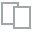
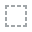
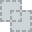
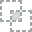
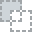
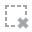
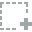
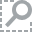
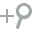
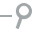
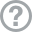
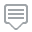
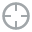
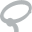
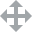
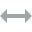
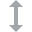
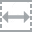
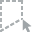
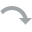
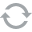
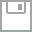
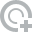
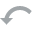
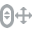
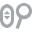
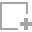
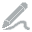
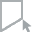
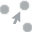
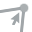
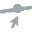

In [ ]:
create_report(df).show()

# Data Outlier

In [ ]:
df_num= df.copy()

df_num = df_num.drop(columns=['gender', 'PaymentMethod'])

In [ ]:
def outlier_thresholds(dataframe, feature):
  Q1 =dataframe[feature].quantile(.25)
  Q3 =dataframe[feature].quantile(.75)
  IQR = Q3-Q1
  lower = Q1- 1.5*IQR
  upper = Q3 + 1.5*IQR
  return lower, upper

def has_outliers(dataframe, feature):
  lower, upper = outlier_thresholds(dataframe, feature)
  if df_num[(dataframe[feature] > upper)].any(axis=None):
    print(feature,"TERDAPAT OUTLIER")
  else:
    print(feature, "TIDAK TERDAPAT OUTLIER")

for kol in df_num.columns:
  has_outliers(df, kol)

MonthlyCharges TIDAK TERDAPAT OUTLIER
TotalCharges TIDAK TERDAPAT OUTLIER
Churn TIDAK TERDAPAT OUTLIER


In [ ]:
df_num

MonthlyCharges  TotalCharges  Churn
0              29.85         29.85      0
1              56.95       1889.50      0
2              53.85        108.15      1
3              42.30       1840.75      0
4              70.70        151.65      1
...              ...           ...    ...
6970           84.80       1990.50      0
6971          103.20       7362.90      0
6972           29.60        346.45      0
6973           74.40        306.60      1
6974          105.65       6844.50      0

[6975 rows x 3 columns]

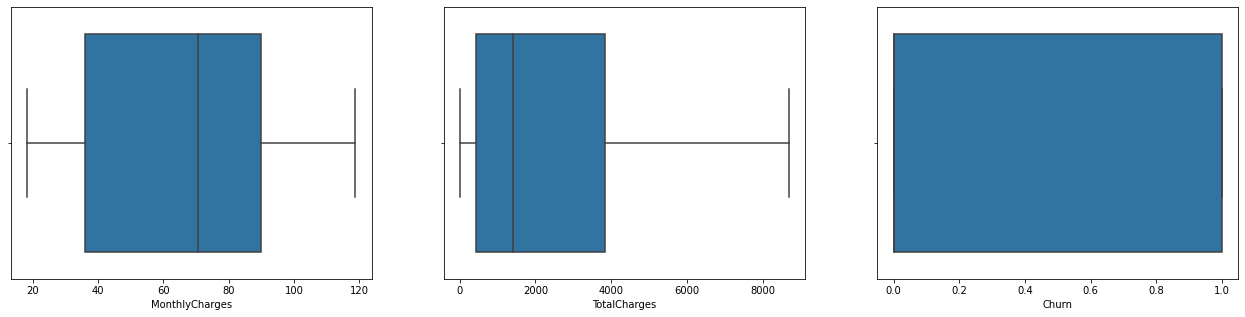

In [ ]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1) 
sns.boxplot(x='MonthlyCharges', data=df_num);
plt.subplot(1,3,2)
sns.boxplot(x='TotalCharges', data=df_num);
plt.subplot(1,3,3)
sns.boxplot(x='Churn', data=df_num);

# Feature Engineering

In [22]:
df_fe = df.copy()
df_fe['AvgNumberofPayments'] = df_fe['TotalCharges']/df_fe['MonthlyCharges']
df_fe.head(20)

gender              PaymentMethod  MonthlyCharges  TotalCharges  Churn  \
0   Female           Electronic check           29.85         29.85      0   
1     Male               Mailed check           56.95       1889.50      0   
2     Male               Mailed check           53.85        108.15      1   
3     Male  Bank transfer (automatic)           42.30       1840.75      0   
4   Female           Electronic check           70.70        151.65      1   
5   Female           Electronic check           99.65        820.50      1   
6     Male    Credit card (automatic)           89.10       1949.40      0   
7   Female               Mailed check           29.75        301.90      0   
8   Female           Electronic check          104.80       3046.05      1   
9     Male  Bank transfer (automatic)           56.15       3487.95      0   
10    Male               Mailed check           49.95        587.45      0   
11    Male    Credit card (automatic)           18.95        326.80      0   
12    Male    Credit card (automatic)          100.35       5681.10      0   
13    Male  Bank transfer (automatic)          103.70       5036.30      1   
14    Male           Electronic check          105.50       2686.05      0   
15  Female    Credit card (automatic)          113.25       7895.15      0   
16  Female               Mailed check           20.65       1022.95      0   
17    Male  Bank transfer (automatic)          106.70       7382.25      0   
18  Female    Credit card (automatic)           55.20        528.35      1   
19  Female           Electronic check           90.05       1862.90      0   

    AvgNumberofPayments  
0              1.000000  
1             33.178227  
2              2.008357  
3             43.516548  
4              2.144979  
5              8.233818  
6             21.878788  
7             10.147899  
8             29.065363  
9             62.118433  
10            11.760761  
11            17.245383  
12            56.612855  
13            48.566056  
14            25.460190  
15            69.714349  
16            49.537530  
17            69.186973  
18             9.571558  
19            20.687396

In [23]:
df_fe['AvgNumberofPayments'].mean()

32.750986993081334

In [24]:
df_fe.corr()

MonthlyCharges  TotalCharges     Churn  \
MonthlyCharges             1.000000      0.649923  0.195538   
TotalCharges               0.649923      1.000000 -0.195824   
Churn                      0.195538     -0.195824  1.000000   
AvgNumberofPayments        0.237323      0.823192 -0.352006   

                     AvgNumberofPayments  
MonthlyCharges                  0.237323  
TotalCharges                    0.823192  
Churn                          -0.352006  
AvgNumberofPayments             1.000000

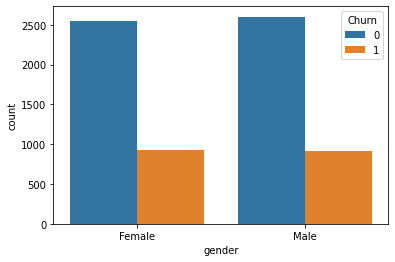

In [25]:
sns.countplot(x='gender', hue='Churn', data=df_fe)

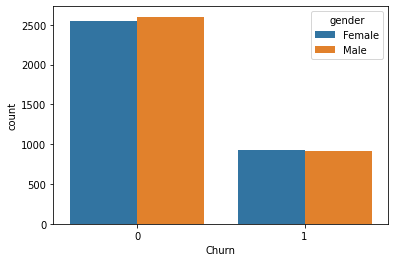

In [42]:
sns.countplot(x='Churn', hue='gender', data=df_fe)

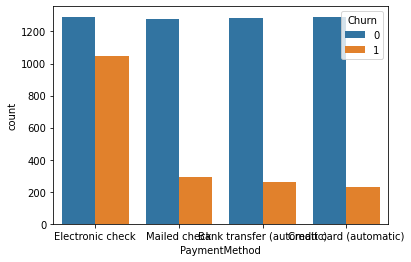

In [27]:
sns.countplot(x='PaymentMethod', hue='Churn',data=df_fe)

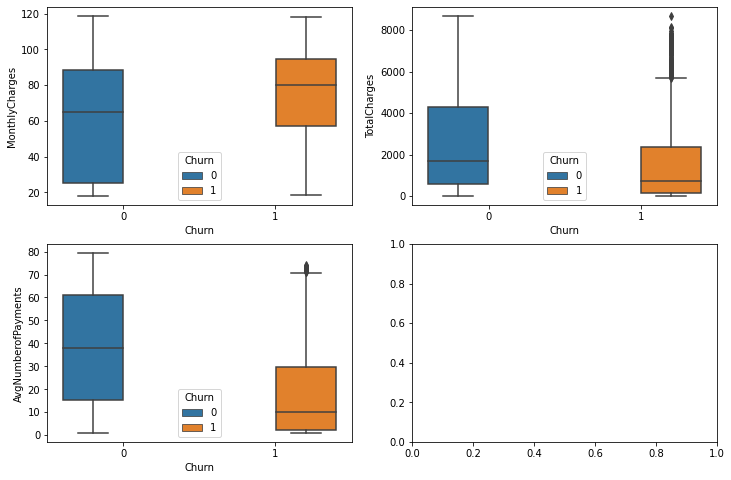

In [ ]:
fig, axarr = plt.subplots(2,2, figsize=(12,8))
sns.boxplot(y='MonthlyCharges', x='Churn', hue='Churn', data=df_fe, ax=axarr[0][0])
sns.boxplot(y='TotalCharges', x='Churn', hue='Churn', data=df_fe, ax=axarr[0][1])
sns.boxplot(y='AvgNumberofPayments', x='Churn', hue='Churn', data=df_fe, ax=axarr[1][0])

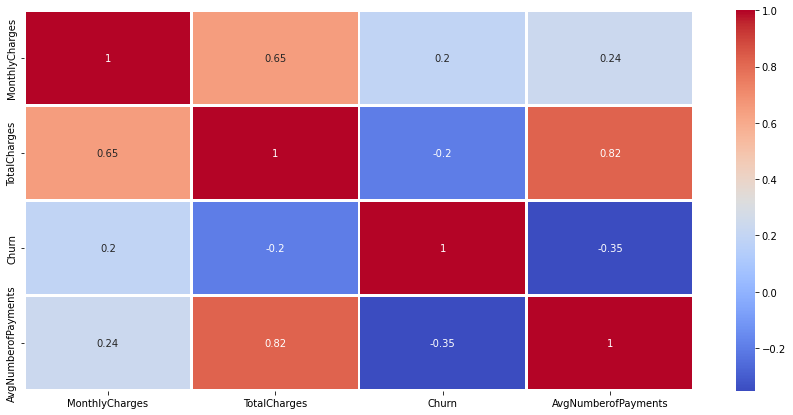

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.heatmap(df_fe.corr(), cmap = "coolwarm", annot=True, linewidth=2)

The plot will not show in a notebook environment, please try 'show_browser' if you want to open it in browser



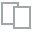
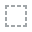
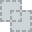
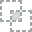
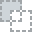
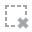
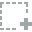
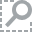
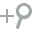
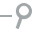
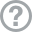
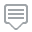
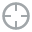
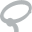
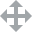
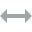
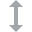
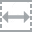
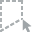
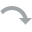
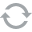
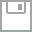
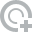
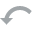
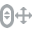
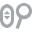
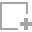
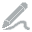
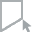
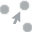
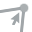
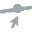

In [ ]:
create_report(df_fe).show()

# Train Test Split

In [ ]:
df_fe = pd.get_dummies(df_fe, columns=['gender', 'PaymentMethod'], drop_first=True)

In [ ]:
df_fe.head()

MonthlyCharges  TotalCharges  Churn  AvgNumberofPayments  gender_Male  \
0           29.85         29.85      0             1.000000            0   
1           56.95       1889.50      0            33.178227            1   
2           53.85        108.15      1             2.008357            1   
3           42.30       1840.75      0            43.516548            1   
4           70.70        151.65      1             2.144979            0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0

In [ ]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
rb.fit(df_fe)
rb_scaled_df = pd.DataFrame(rb.transform(df_fe), columns = df_fe.columns)
rb_scaled_df.head()

MonthlyCharges  TotalCharges  Churn  AvgNumberofPayments  gender_Male  \
0       -0.753475     -0.406209    0.0            -0.611305         -1.0   
1       -0.251158      0.139231    0.0             0.083459          0.0   
2       -0.308619     -0.383244    1.0            -0.589533          0.0   
3       -0.522706      0.124932    0.0             0.306674          0.0   
4        0.003707     -0.370485    1.0            -0.586583         -1.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0

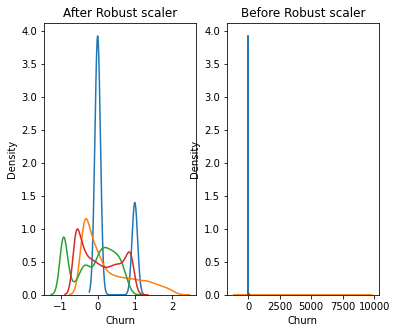

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))


ax1.set_title('After Robust scaler')
sns.kdeplot(rb_scaled_df['Churn'], ax=ax1)
sns.kdeplot(rb_scaled_df['TotalCharges'], ax=ax1)
sns.kdeplot(rb_scaled_df['MonthlyCharges'], ax=ax1)
sns.kdeplot(rb_scaled_df['AvgNumberofPayments'], ax=ax1)


ax2.set_title('Before Robust scaler')
sns.kdeplot(df_fe['Churn'], ax=ax2)
sns.kdeplot(df_fe['TotalCharges'], ax=ax2)
sns.kdeplot(df_fe['MonthlyCharges'], ax=ax2)
sns.kdeplot(df_fe['AvgNumberofPayments'], ax=ax2)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = rb_scaled_df.drop(columns=['Churn']).copy()
y = rb_scaled_df['Churn'].copy()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=36)

print(len(X_train))
print(len(X_test))
print(len(y_train))


5231
1744
5231


In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_train)
# evaluate predictions on train set
accuracy = accuracy_score(y_train, y_pred)
print('Model XGBoost Accuracy on Training set: %.2f' % (accuracy*100))

y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Model XGBoost Accuracy on Test set: %.2f' % (accuracy*100))

Model XGBoost Accuracy on Training set: 81.11
Model XGBoost Accuracy on Test set: 78.84


# Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

classifiers = [RandomForestClassifier(),
               KNeighborsClassifier(), 
               SVC(probability=True),
               DecisionTreeClassifier(),
               GradientBoostingClassifier(),
               XGBClassifier(),
               LGBMClassifier()]
for cls in classifiers:
    cls.fit(X_train, y_train)

pipe_dict = {0: "RandomForest", 1: "KNeighbours",2: "SVC", 3:'DecisionTree',
             4:'GradientBoosting', 5:'XGBoost', 6:'Light GBM'}

In [ ]:
for i, model in enumerate(classifiers):
    y_pred = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_train)[::,-1]
    print((pipe_dict[i]))
    print("Accuracy: {:.4f}".format(accuracy_score(y_train, y_pred)*100))
    print("Precision: {:.4f}".format(precision_score(y_train, y_pred)*100))
    print("Recall: {:.4f}".format(recall_score(y_train, y_pred)*100))
    print("F1-Score: {:.4f}".format(f1_score(y_train, y_pred)*100))
    print("ROC AUC: {:.4f}".format(roc_auc_score(y_train, y_pred_proba)*100))
    print('=' *15)

RandomForest
Accuracy: 99.5412
Precision: 99.1822
Recall: 99.0349
F1-Score: 99.1085
ROC AUC: 99.9930
KNeighbours
Accuracy: 84.0184
Precision: 72.9560
Recall: 60.2821
F1-Score: 66.0163
ROC AUC: 89.6502
SVC
Accuracy: 79.2774
Precision: 67.1001
Recall: 38.3073
F1-Score: 48.7713
ROC AUC: 78.3267
DecisionTree
Accuracy: 99.5412
Precision: 100.0000
Recall: 98.2183
F1-Score: 99.1011
ROC AUC: 99.9945
GradientBoosting
Accuracy: 81.7052
Precision: 69.6177
Recall: 51.3734
F1-Score: 59.1200
ROC AUC: 86.8832
XGBoost
Accuracy: 81.1126
Precision: 67.8607
Recall: 50.6310
F1-Score: 57.9932
ROC AUC: 85.7668
Light GBM
Accuracy: 85.1654
Precision: 76.6573
Recall: 60.9503
F1-Score: 67.9074
ROC AUC: 92.7024


In [ ]:
for i, model in enumerate(classifiers):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::,-1]
    print((pipe_dict[i]))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)*100))

RandomForest
Accuracy: 75.5161
KNeighbours
Accuracy: 77.2936
SVC
Accuracy: 77.7523
DecisionTree
Accuracy: 70.8142
GradientBoosting
Accuracy: 78.5550
XGBoost
Accuracy: 78.8417
Light GBM
Accuracy: 78.2683


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.metrics import accuracy_score,  confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

for i, model in enumerate(classifiers):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[::,-1]
    print((pipe_dict[i]))
    print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)*100))
    print("Precision: {:.4f}".format(precision_score(y_test, y_pred)*100))
    print("Recall: {:.4f}".format(recall_score(y_test, y_pred)*100))
    print("F1-Score: {:.4f}".format(f1_score(y_test, y_pred)*100))
    print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_pred_proba)*100))
    print('=' *15)

RandomForest
Accuracy: 75.5161
Precision: 58.7537
Recall: 40.7407
F1-Score: 48.1166
ROC AUC: 77.9794
KNeighbours
Accuracy: 77.2936
Precision: 62.3626
Recall: 46.7078
F1-Score: 53.4118
ROC AUC: 77.9473
SVC
Accuracy: 77.7523
Precision: 68.1481
Recall: 37.8601
F1-Score: 48.6772
ROC AUC: 77.0820
DecisionTree
Accuracy: 70.8142
Precision: 47.4836
Recall: 44.6502
F1-Score: 46.0233
ROC AUC: 62.8647
GradientBoosting
Accuracy: 78.5550
Precision: 65.8192
Recall: 47.9424
F1-Score: 55.4762
ROC AUC: 82.2211
XGBoost
Accuracy: 78.8417
Precision: 66.3866
Recall: 48.7654
F1-Score: 56.2278
ROC AUC: 82.5953
Light GBM
Accuracy: 78.2683
Precision: 65.3295
Recall: 46.9136
F1-Score: 54.6108
ROC AUC: 81.7248


# Balance dataset

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(sampling_strategy=.85)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size=0.25, random_state=36)
X_train_over, y_train_over = oversample.fit_resample(X_train_over, y_train_over)

print("After oversampling: ", Counter(y_train_over))

After oversampling:  Counter({0.0: 3884, 1.0: 3301})


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_over, y_train_over)

RandomForestClassifier()

In [ ]:
xgb= XGBClassifier()
xgb.fit(X_train_over, y_train_over)

XGBClassifier()

In [ ]:
xgb_pred = rf.predict(X_train_over)
xgb_proba = rf.predict_proba(X_train_over)[::,-1]
print("Accuracy: {:.4f}".format(accuracy_score(y_train_over, xgb_pred)*100))
print("Precision: {:.4f}".format(precision_score(y_train_over, xgb_pred)*100))
print("Recall: {:.4f}".format(recall_score(y_train_over, xgb_pred)*100))
print("F1-Score: {:.4f}".format(f1_score(y_train_over, xgb_pred)*100))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_train_over, xgb_proba)*100))

Accuracy: 99.6660
Precision: 99.4268
Recall: 99.8485
F1-Score: 99.6372
ROC AUC: 99.9964


In [ ]:
y_pred = rf.predict(X_train_over)
# evaluate predictions on train set
accuracy = accuracy_score(y_train_over, y_pred)
print('Model XGBoost Accuracy on Training set: %.2f' % (accuracy*100))

y_pred = rf.predict(X_test_over)
accuracy = accuracy_score(y_test_over, y_pred)

print('Model XGBoost Accuracy on Test set: %.2f' % (accuracy*100))

Model XGBoost Accuracy on Training set: 99.67
Model XGBoost Accuracy on Test set: 73.34


In [ ]:
y_pred = xgb.predict(X_train_over)
# evaluate predictions on train set
accuracy = accuracy_score(y_train_over, y_pred)
print('Model XGBoost Accuracy on Training set: %.2f' % (accuracy*100))

y_pred = xgb.predict(X_test_over)
accuracy = accuracy_score(y_test_over, y_pred)

print('Model XGBoost Accuracy on Test set: %.2f' % (accuracy*100))

Model XGBoost Accuracy on Training set: 77.38
Model XGBoost Accuracy on Test set: 76.03


In [ ]:
pd.DataFrame(confusion_matrix(y_test_over, xgb_tuned))

0    1
0  983  275
1  139  347

In [ ]:
pd.DataFrame(confusion_matrix(y_test, xgb_tuned))

0    1
0  983  275
1  139  347

# Feature Importance

<BarContainer object of 7 artists>

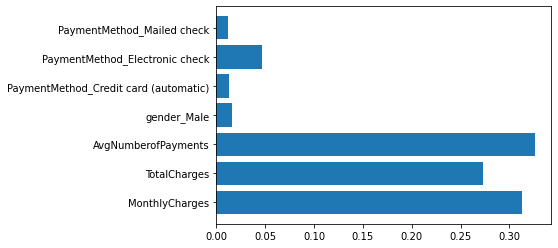

In [ ]:
fi =rf.feature_importances_
col = X_train_over.columns
plt.barh(col, fi)

# Parameter Tuning

## XGBoost 

In [ ]:
xgb_clf = XGBClassifier(random_state = 36)

In [ ]:
xgb_clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 36,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
xgb_param = {
            'max_depth': list(range(1,6)),
            'gamma': list(range(1,6)),
            'min_child_weight': list(range(1,6)),
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]}

In [ ]:
gs_xgb = GridSearchCV(xgb_clf, xgb_param, cv=5, n_jobs=1, verbose=2)

In [ ]:
gs_xgb.fit(X_train_over, y_train_over)

Output streaming akan dipotong hingga 5000 baris terakhir.
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=2, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=3, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=3, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=3, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=2, max_depth=4, min_child_weight=3, subsample=0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(gamma=1, max_depth=5, min_child_weight=5),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [1, 2, 3, 4, 5], 'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [ ]:
gs_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 2,
 'max_depth': 5,
 'min_child_weight': 4,
 'subsample': 0.8}

In [ ]:
xgb_clf = XGBClassifier(booster= 'gbtree', gamma=2, max_depth=5, min_child_weight=4, colsample_bytree=1, subsample=.8)
xgb_clf = xgb_clf.fit(X_train_over, y_train_over)

In [ ]:
# AFTER TUNING
xgb_tuned = xgb_clf.predict(X_test_over)
xgb_proba = xgb.predict_proba(X_test_over)[::,-1]
print("Accuracy: {:.4f}".format(accuracy_score(y_test_over, xgb_tuned)*100))
print("Precision: {:.4f}".format(precision_score(y_test_over, xgb_tuned)*100))
print("Recall: {:.4f}".format(recall_score(y_test_over, xgb_tuned)*100))
print("F1-Score: {:.4f}".format(f1_score(y_test_over, xgb_tuned)*100))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test_over, xgb_proba)*100))

Accuracy: 76.2615
Precision: 55.7878
Recall: 71.3992
F1-Score: 62.6354
ROC AUC: 82.5385


In [ ]:
xgb_tuned = xgb_clf.predict(X_train_over)
xgb_proba = xgb.predict_proba(X_train_over)[::,-1]
print("Accuracy: {:.4f}".format(accuracy_score(y_train_over, xgb_tuned)*100))
print("Precision: {:.4f}".format(precision_score(y_train_over, xgb_tuned)*100))
print("Recall: {:.4f}".format(recall_score(y_train_over, xgb_tuned)*100))
print("F1-Score: {:.4f}".format(f1_score(y_train_over, xgb_tuned)*100))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_train_over, xgb_proba)*100))

Accuracy: 80.9325
Precision: 77.6094
Recall: 82.2175
F1-Score: 79.8470
ROC AUC: 86.0576


In [ ]:
#DATA ASLI
xgb_tuned = xgb_clf.predict(X_train_over)
xgb_proba = xgb.predict_proba(X_train_over)[::,-1]
print("Accuracy: {:.4f}".format(accuracy_score(y_train_over, xgb_tuned)*100))
print("Precision: {:.4f}".format(precision_score(y_train_over, xgb_tuned)*100))
print("Recall: {:.4f}".format(recall_score(y_train_over, xgb_tuned)*100))
print("F1-Score: {:.4f}".format(f1_score(y_train_over, xgb_tuned)*100))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_train_over, xgb_proba)*100))

Accuracy: 79.3189
Precision: 76.1087
Recall: 80.1446
F1-Score: 78.0746
ROC AUC: 86.0154


In [ ]:
# DATA ASLI
xgb_tuned = xgb_clf.predict(X_test_over)
xgb_proba = xgb.predict_proba(X_test_over)[::,-1]
print("Accuracy: {:.4f}".format(accuracy_score(y_test_over, xgb_tuned)*100))
print("Precision: {:.4f}".format(precision_score(y_test_over, xgb_tuned)*100))
print("Recall: {:.4f}".format(recall_score(y_test_over, xgb_tuned)*100))
print("F1-Score: {:.4f}".format(f1_score(y_test_over, xgb_tuned)*100))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test_over, xgb_proba)*100))

Accuracy: 75.8092
Precision: 54.9550
Recall: 74.3902
F1-Score: 63.2124
ROC AUC: 83.1798


In [ ]:
pd.DataFrame(confusion_matrix(y_test, xgb_tuned))

0    1
0  982  276
1  174  312

In [ ]:
pd.DataFrame(confusion_matrix(y_test, xgb_tuned))

0    1
0  974  284
1  159  327

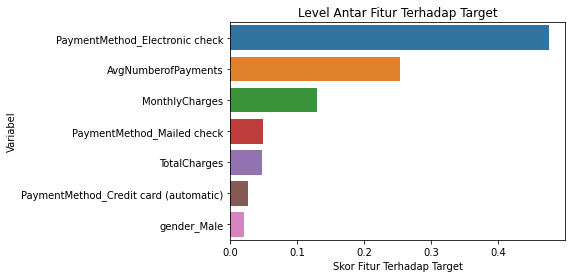

In [ ]:
feature_imp = pd.Series(xgb.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Skor Fitur Terhadap Target')
plt.ylabel('Variabel')
plt.title("Level Antar Fitur Terhadap Target")
plt.show()

<BarContainer object of 7 artists>

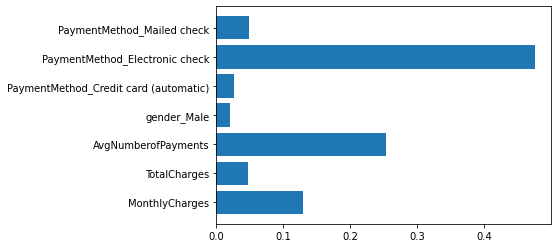

In [ ]:
fi =xgb.feature_importances_
col = X_train_over.columns
plt.barh(col, fi) 